# Browse TD-MPC2 Runs

Interactive notebook for monitoring training progress, analyzing runs, and managing videos.

## Setup

In [12]:
from pathlib import Path
import sys

# Ensure repo root is importable
ROOT = Path('..').resolve()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

# Configuration
LOGS_DIR = ROOT / 'tdmpc2' / 'logs'
WANDB_PROJECT = 'wm-planning/mmbench'
WANDB_LIMIT = None  # No limit
CACHE_PATH = ROOT / 'discover' / 'runs_cache.parquet'
TARGET_STEP = 5_000_000

print(f"ROOT: {ROOT}")
print(f"LOGS_DIR: {LOGS_DIR}")
print(f"WANDB_PROJECT: {WANDB_PROJECT}")

ROOT: /home/projects/dharel/nadavt/repos/newt
LOGS_DIR: /home/projects/dharel/nadavt/repos/newt/tdmpc2/logs
WANDB_PROJECT: wm-planning/mmbench


## Load Runs Data

In [13]:
from discover.cache import RunsCache

cache = RunsCache(
    logs_dir=LOGS_DIR,
    cache_path=CACHE_PATH,
    wandb_project=WANDB_PROJECT,
    wandb_limit=WANDB_LIMIT,
)

# Load data (set refresh=True to force re-fetch from local/wandb)
df_all, latest_ts, used_cache = cache.load(refresh=False)

print(f"Total rows: {len(df_all)}")
print(f"Using cache: {used_cache}")
print(f"Latest timestamp: {latest_ts}")
df_all.head()

Total rows: 4106
Using cache: True
Latest timestamp: 2025-12-10 06:32:43.966566


,source,task,seed,exp_name,run_dir,ckpt_path,ckpt_step,updated_at,videos,config_path,wandb_run_id,run_id,state,tags,user,url,summary,artifacts
0,local,reacher-hard,1,expert_reacher-hard,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,3800000.0,2025-12-09T12:04:24.487996,[],None,None,nan,nan,None,nan,nan,None,None
1,local,reacher-hard,1,expert_reacher-hard,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,2700000.0,2025-12-09T01:17:38.339315,[],None,None,nan,nan,None,nan,nan,None,None
2,local,reacher-hard,1,expert_reacher-hard,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,1100000.0,2025-12-08T09:28:12.393685,[],None,None,nan,nan,None,nan,nan,None,None
3,local,reacher-hard,1,expert_reacher-hard,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,2900000.0,2025-12-09T03:16:39.182672,[],None,None,nan,nan,None,nan,nan,None,None
4,local,reacher-hard,1,expert_reacher-hard,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,/home/projects/dharel/nadavt/repos/newt/tdmpc2...,3600000.0,2025-12-09T10:06:20.427796,[],None,None,nan,nan,None,nan,nan,None,None


## Training Progress Overview

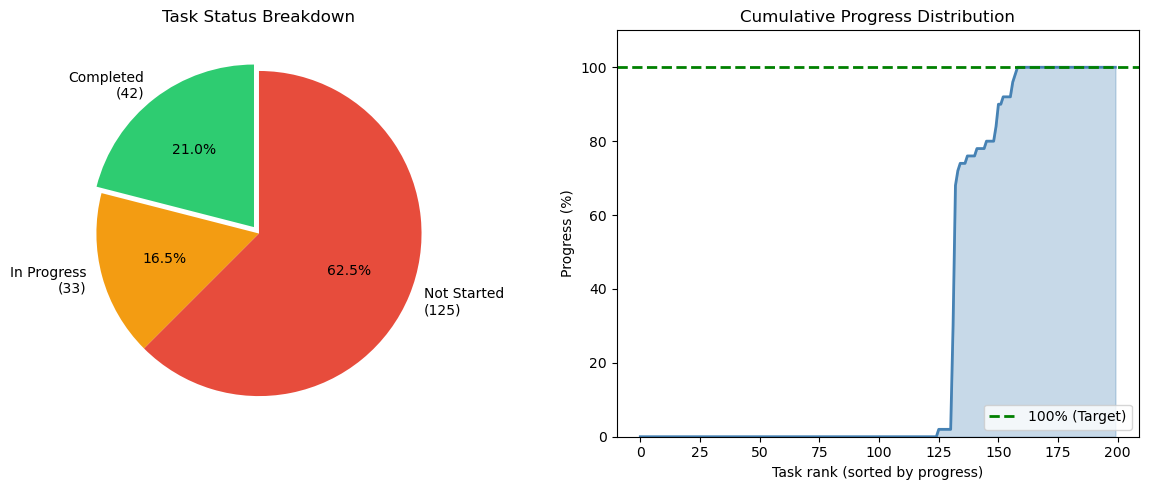

                 TRAINING PROGRESS SUMMARY                  
  Total tasks:            200
  Target step:         5,000,000
------------------------------------------------------------
  ✅ Completed:            42 (21.0%)
  🔄 In Progress:          33 (16.5%)
  ❌ Not Started:         125 (62.5%)
------------------------------------------------------------
  Average progress:      31.8%
  Median progress:        0.0%
  Min steps:                0
  Max steps:           5,000,000


In [14]:
from discover.plots import training_overview

training_overview(df_all, target_step=TARGET_STEP)

## Per-Task Progress

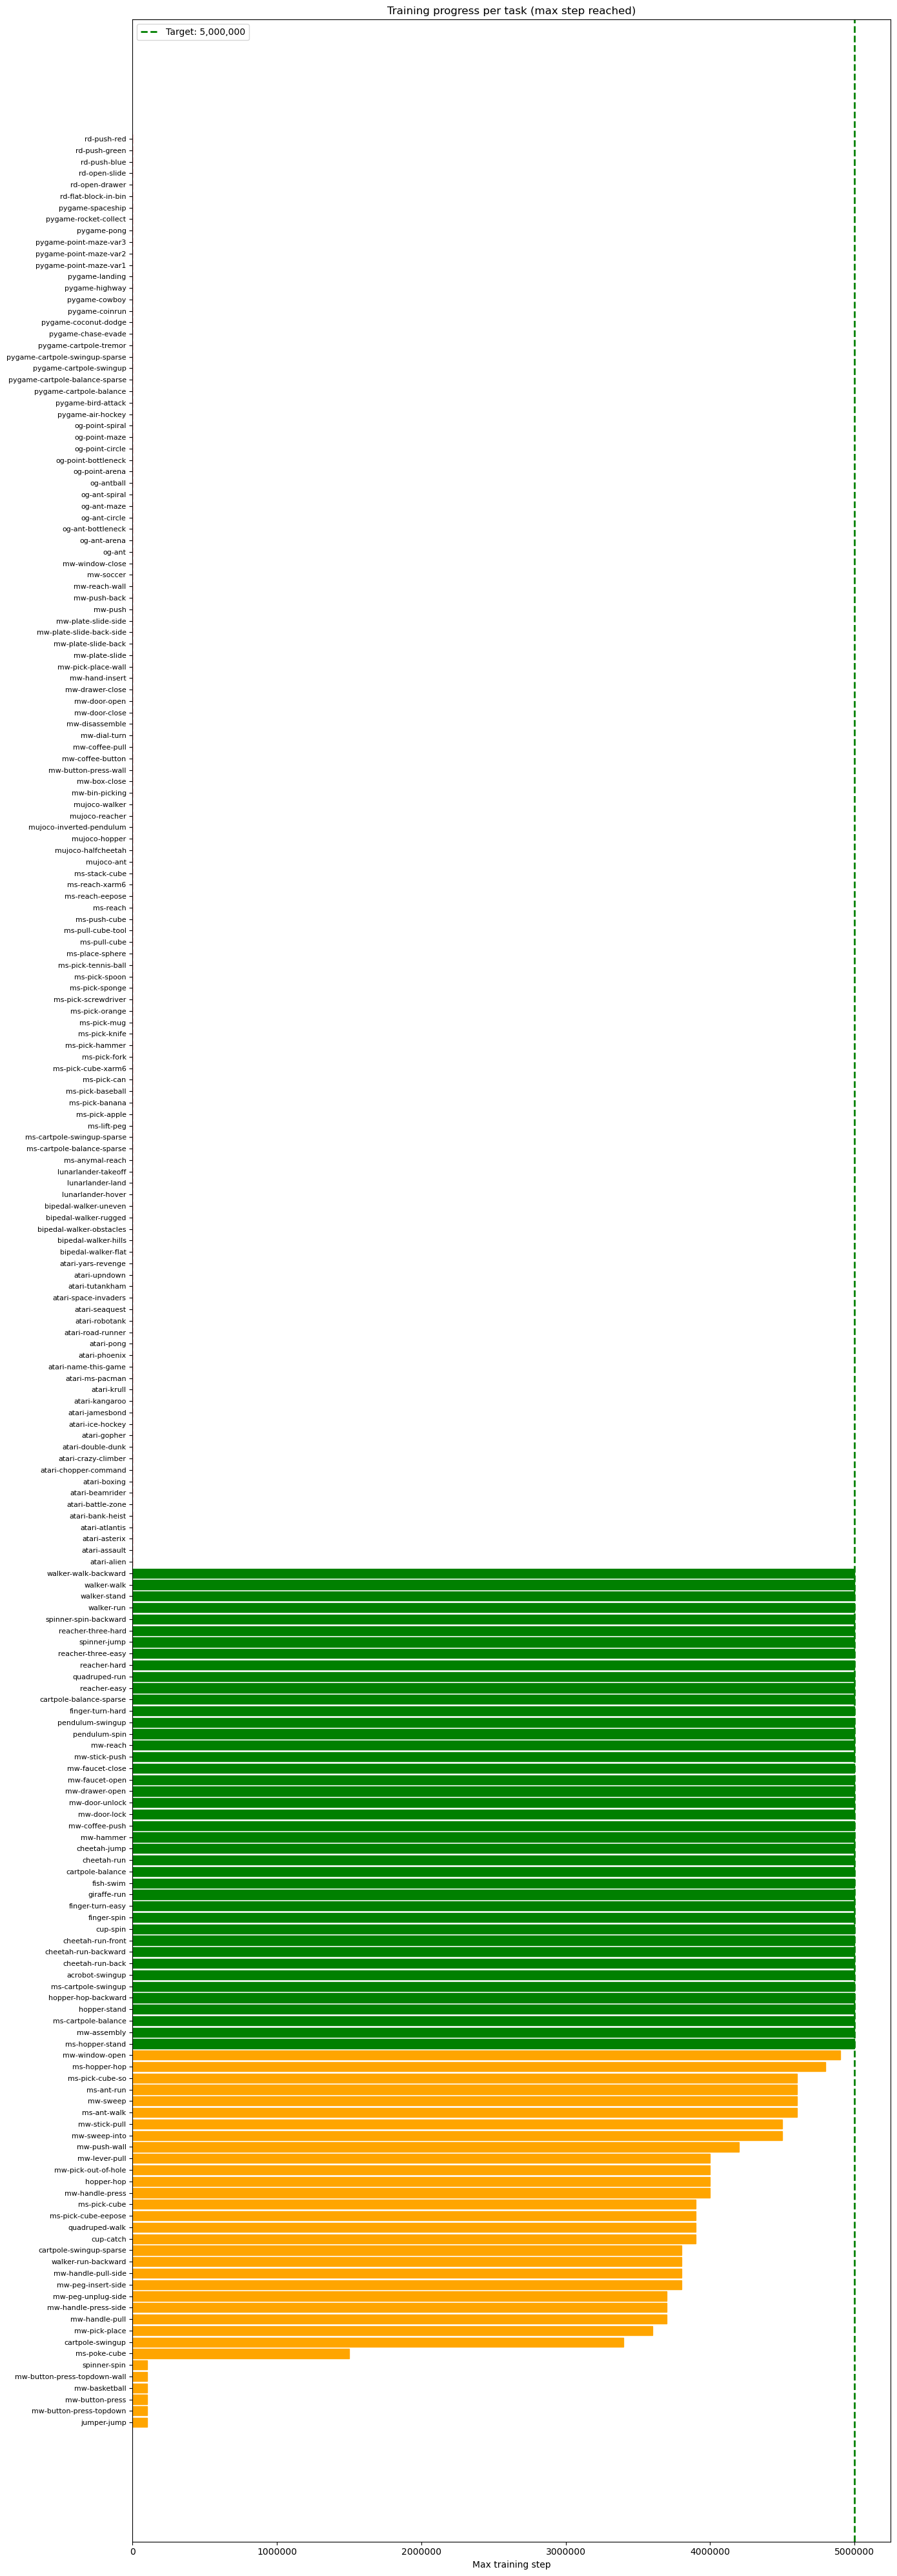

In [15]:
from discover.plots import plot_max_steps

# Green = completed, Orange = in progress, Red = not started
plot_max_steps(df_all, target_step=TARGET_STEP)

## Tasks Requiring Attention

In [16]:
from discover.plots import tasks_needing_attention

tasks_needing_attention(df_all, target_step=TARGET_STEP, bottom_n=15)

                      TASKS REQUIRING ATTENTION                       

❌ NOT STARTED (125 tasks):
----------------------------------------------------------------------
   • atari-alien
   • atari-assault
   • atari-asterix
   • atari-atlantis
   • atari-bank-heist
   • atari-battle-zone
   • atari-beamrider
   • atari-boxing
   • atari-chopper-command
   • atari-crazy-climber
   • atari-double-dunk
   • atari-gopher
   • atari-ice-hockey
   • atari-jamesbond
   • atari-kangaroo
   • atari-krull
   • atari-ms-pacman
   • atari-name-this-game
   • atari-phoenix
   • atari-pong
   • atari-road-runner
   • atari-robotank
   • atari-seaquest
   • atari-space-invaders
   • atari-tutankham
   • atari-upndown
   • atari-yars-revenge
   • bipedal-walker-flat
   • bipedal-walker-hills
   • bipedal-walker-obstacles
   • bipedal-walker-rugged
   • bipedal-walker-uneven
   • lunarlander-hover
   • lunarlander-land
   • lunarlander-takeoff
   • ms-anymal-reach
   • ms-cartpole-balance-sparse
   • 

## Progress by Domain

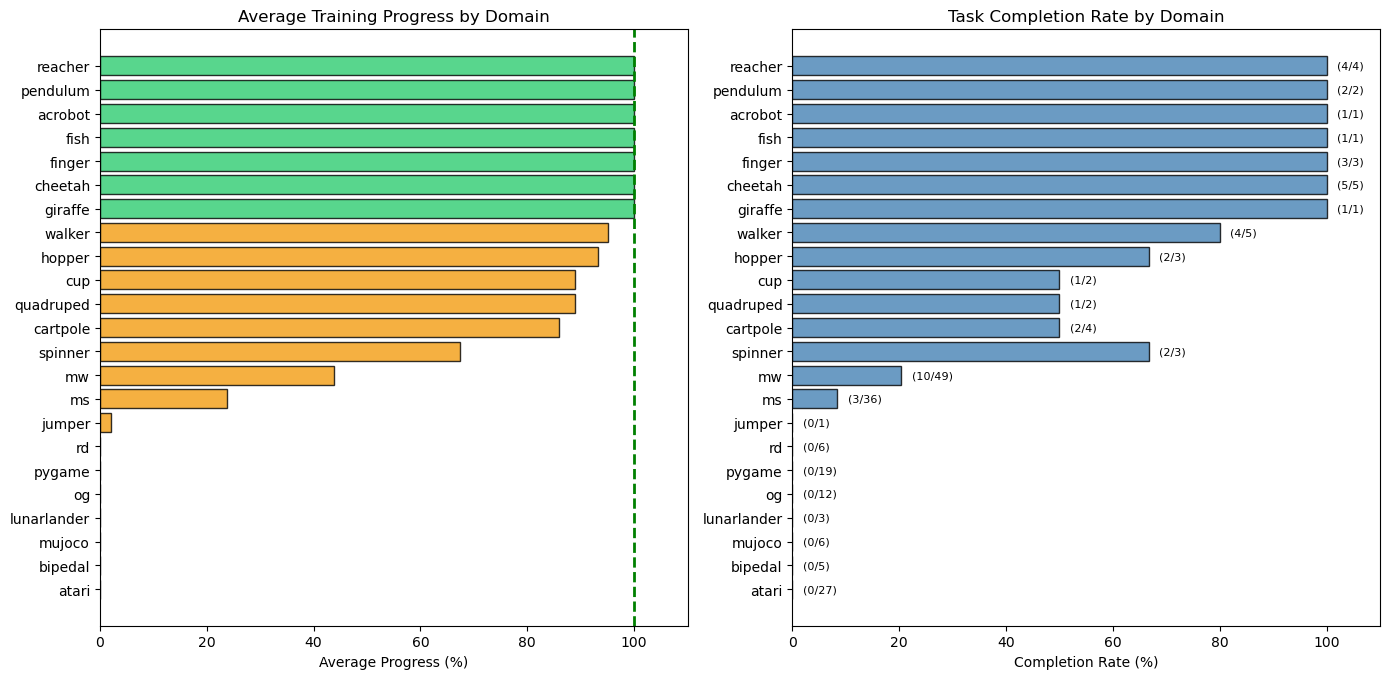


Domain Summary:
--------------------------------------------------------------------------------
Domain                  Tasks   Complete   Avg Progress   Completion %
--------------------------------------------------------------------------------
giraffe                     1          1         100.0%         100.0%
finger                      3          3         100.0%         100.0%
cheetah                     5          5         100.0%         100.0%
pendulum                    2          2         100.0%         100.0%
acrobot                     1          1         100.0%         100.0%
reacher                     4          4         100.0%         100.0%
fish                        1          1         100.0%         100.0%
walker                      5          4          95.2%          80.0%
hopper                      3          2          93.3%          66.7%
cup                         2          1          89.0%          50.0%
quadruped                   2          1

In [17]:
from discover.plots import progress_by_domain

progress_by_domain(df_all, target_step=TARGET_STEP)

## Tasks Ready for Evaluation (50%+ trained)

In [18]:
from discover.eval import tasks_ready_for_eval

ready_df, tasks_need_eval, tasks_with_videos = tasks_ready_for_eval(
    df_all,
    logs_dir=LOGS_DIR,
    target_step=TARGET_STEP,
    min_progress=0.5
)

print(f"\nTasks needing eval: {len(tasks_need_eval)}")
print(f"Tasks with videos: {len(tasks_with_videos)}")

                   TASKS READY FOR EVALUATION (≥50% trained)                    

Total tasks at ≥50%: 68
  ✅ With videos:    67
  ❌ Without videos: 1

────────────────────────────────────────────────────────────────────────────────
Tasks WITH videos:
────────────────────────────────────────────────────────────────────────────────
  ✅ acrobot-swingup                                5,000,000 (100.0%)
  ✅ cartpole-balance                               5,000,000 (100.0%)
  ✅ cartpole-balance-sparse                        5,000,000 (100.0%)
  ✅ cheetah-jump                                   5,000,000 (100.0%)
  ✅ reacher-easy                                   5,000,000 (100.0%)
  ✅ cheetah-run                                    5,000,000 (100.0%)
  ✅ cheetah-run-back                               5,000,000 (100.0%)
  ✅ cheetah-run-backward                           5,000,000 (100.0%)
  ✅ cup-spin                                       5,000,000 (100.0%)
  ✅ cheetah-run-front                

## Generate Eval Script (for tasks without videos)

In [19]:
from discover.eval import generate_eval_script

if tasks_need_eval:
    generate_eval_script(
        tasks=tasks_need_eval,
        output_dir=ROOT / 'tdmpc2' / 'jobs',
        project_root=ROOT,
    )
else:
    print("✅ All 50%+ trained tasks already have videos!")

✅ Written task list to: /home/projects/dharel/nadavt/repos/newt/tdmpc2/jobs/tasks_need_eval.txt
   (1 tasks)
✅ Written LSF script to: /home/projects/dharel/nadavt/repos/newt/tdmpc2/jobs/run_eval_need_videos.lsf

📋 To submit the eval jobs, run:
   cd /home/projects/dharel/nadavt/repos/newt/tdmpc2
   bsub < jobs/run_eval_need_videos.lsf


## Collect Videos for Download

In [20]:
from discover.eval import collect_videos

videos_df = collect_videos(
    df_all,
    logs_dir=LOGS_DIR,
    output_dir=ROOT / 'discover' / 'videos_for_presentation',
    target_step=TARGET_STEP,
    min_progress=0.5,
    create_symlinks=True,
)

                       VIDEOS COLLECTED FOR PRESENTATION                        

📁 Output directory: /home/projects/dharel/nadavt/repos/newt/discover/videos_for_presentation
   Total videos: 67
   Method: symlinks

────────────────────────────────────────────────────────────────────────────────
Task                                                  Step   Progress
────────────────────────────────────────────────────────────────────────────────
  acrobot-swingup                                5,000,000     100.0%
  cartpole-balance                               5,000,000     100.0%
  cartpole-balance-sparse                        5,000,000     100.0%
  cartpole-swingup                               3,400,000      68.0%
  cartpole-swingup-sparse                        3,800,000      76.0%
  cheetah-jump                                   5,000,000     100.0%
  cheetah-run                                    5,000,000     100.0%
  cheetah-run-back                               5,000,000    